In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Company_Data.csv')
data1 = data.copy()

In [4]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data1[data1.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [7]:
data1["Salestype"] = data1["Sales"]>7.49*1
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Salestype
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,True
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,True
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,True
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,False
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,True
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,False
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,False
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,False


In [8]:
label_encoder = preprocessing.LabelEncoder()
data1["ShelveLoc"] = label_encoder.fit_transform(data1["ShelveLoc"])
data1["Urban"] = label_encoder.fit_transform(data1["Urban"])
data1["US"] = label_encoder.fit_transform(data1["US"])
data1["Salestype"] = label_encoder.fit_transform(data1["Salestype"])

In [9]:
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Salestype
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [10]:
X = data1.iloc[:, 1:9]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14
396,139,23,3,37,120,2,55,11
397,162,26,12,368,159,2,40,18
398,100,79,7,284,95,0,50,12


In [11]:
Y = data1.iloc[:, -1]

In [13]:
Y.values

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [15]:
kfold = KFold(n_splits=10, random_state=38, shuffle=True)

### Random Forest classifier

In [16]:
model = RandomForestClassifier(n_estimators=115, max_features=5)

In [18]:
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8025


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
model.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=115)

In [21]:
Y_pred = model.predict(X_train)

In [22]:
print("Accuracy: ", metrics.accuracy_score(Y_train, Y_pred))

Accuracy:  1.0


In [23]:
model.score(X_train, Y_train)

1.0

In [24]:
Y_pred = model.predict(X_test)

In [25]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.85


In [26]:
model.score(X_test, Y_test)

0.85

In [29]:
model.predict([[151, 98, 8, 380, 76, 1, 20, 11]])

array([1], dtype=int64)

In [31]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Price          0.285996
CompPrice      0.132065
ShelveLoc      0.130272
Advertising    0.118765
Age            0.111608
Income         0.097672
Population     0.082068
Education      0.041554
dtype: float64

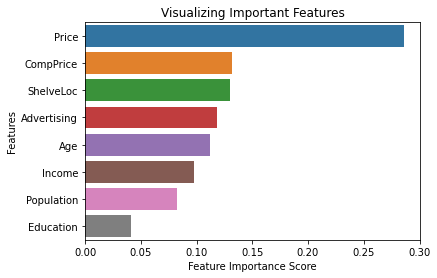

In [33]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [34]:
train_accuracy = []
test_accuracy = []

for max_features in range(1, 15):
    model = RandomForestClassifier(n_estimators = 115, max_features = 5)
    model.fit(X_train, Y_train)
    train_accuracy.append(model.score(X_train, Y_train))
    test_accuracy.append(model.score(X_test, Y_test))

In [35]:
data2 = pd.DataFrame({'max_features':range(1,15),'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy})
data2

,max_features,train_accuracy,test_accuracy
0,1,1.0,0.8500
1,2,1.0,0.8750
2,3,1.0,0.8625
3,4,1.0,0.8625
4,5,1.0,0.8500
5,6,1.0,0.8625
6,7,1.0,0.8375
7,8,1.0,0.8375
8,9,1.0,0.8375
9,10,1.0,0.8750


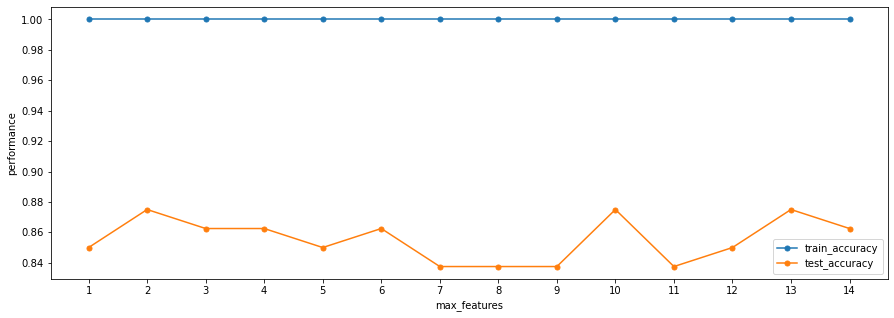

In [37]:
labels = ['train_accuracy', 'test_accuracy']
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
plt.plot(data2['max_features'], data2['train_accuracy'], marker = ".", markersize=10)
plt.plot(data2['max_features'], data2['test_accuracy'], marker = ".", markersize=10)
ax.set_xticks(np.arange(1, 15))
plt.legend(labels)
plt.xlabel('max_features')
plt.ylabel('performance')
plt.show()